In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
import scipy
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare your dataset
path = r'C:\Users\admin\Desktop\Python\Face recognition\Dataset\suresh\image1.jpg'
train_path = r"C:\Users\admin\Desktop\Python\Face recognition\Train_Dataset"
valid_path = r'C:\Users\admin\Desktop\Python\Face recognition\Validation_Dataset'
# validation_data_dir = r'C:\Users\admin\Desktop\Python\Face recognition\Dataset\face'
image_size = (150,150)
batch_size = 3
img = cv2.imread(path)
# print(img)
# plt.imshow(path)
# Step 2: Load the dataset
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
# print(train)
train_dataset = train.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

valid_dataset = validation.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

print(train_dataset.samples)
train_dataset.class_indices

train_dataset.classes
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_dataset.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_fit = model.fit(
    train_dataset,
    # steps_per_epochs=train_dataset.samples//batch_size,
    validation_data = valid_dataset,
    epochs=10,
    # validation_steps=valid_dataset.samples//batch_size
    )
train_dataset.class_indices



Found 36 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
36
Epoch 1/10
12/12 [==============================] - 11s 527ms/step - loss: 1.8671 - accuracy: 0.4444 - val_loss: 1.0945 - val_accuracy: 0.3333
Epoch 2/10
12/12 [==============================] - 5s 420ms/step - loss: 1.1665 - accuracy: 0.4167 - val_loss: 1.3241 - val_accuracy: 0.3333
Epoch 3/10
12/12 [==============================] - 5s 449ms/step - loss: 0.9114 - accuracy: 0.5278 - val_loss: 1.2344 - val_accuracy: 0.3333
Epoch 4/10
12/12 [==============================] - 6s 463ms/step - loss: 0.8679 - accuracy: 0.6111 - val_loss: 1.2861 - val_accuracy: 0.3333
Epoch 5/10
12/12 [==============================] - 6s 499ms/step - loss: 0.8043 - accuracy: 0.6111 - val_loss: 1.3585 - val_accuracy: 0.3333
Epoch 6/10
12/12 [==============================] - 6s 505ms/step - loss: 0.5865 - accuracy: 0.8333 - val_loss: 0.7747 - val_accuracy: 0.6667
Epoch 7/10
12/12 [==============================] - 6s 476ms/step

{'Angelina_Jolie': 0, 'Bill_Gates': 1, 'Emma_Watson': 2}

C:\Users\admin\Desktop\Python\Face recognition\Test_Dataset\gates2.jpg


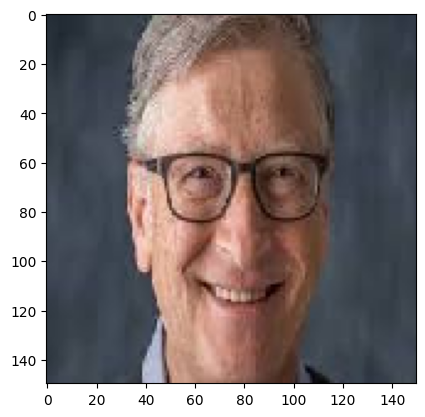

1/1 [==============================] - 0s 456ms/step
1
C:\Users\admin\Desktop\Python\Face recognition\Test_Dataset\jolie2.jpg


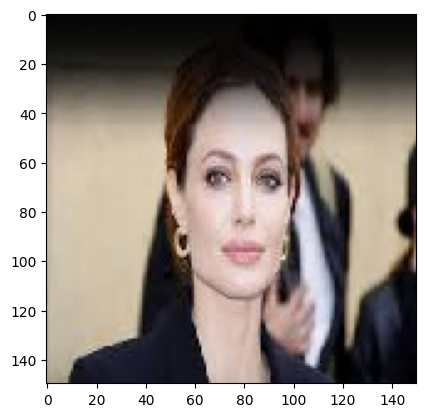

1/1 [==============================] - 0s 80ms/step
0
C:\Users\admin\Desktop\Python\Face recognition\Test_Dataset\watson2.jpg


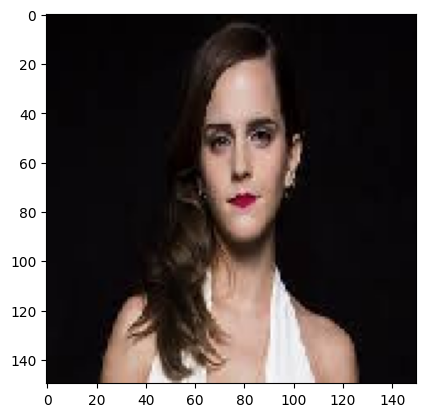

1/1 [==============================] - 0s 176ms/step
1


In [7]:

#Testing Portion
dir_path = r'C:\Users\admin\Desktop\Python\Face recognition\Test_Dataset'

for file in os.listdir(dir_path):
  file_path = os.path.join(dir_path,file)
  print(file_path)
  img = image.load_img(file_path,target_size = (150,150,3))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = X/224
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  max_index = np.argmax(val)
  if max_index == 0:
    ''